<a href="https://colab.research.google.com/github/devreon/Dominorecognition/blob/main/DominoFinalopencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание: Определить домино.

# Подключение библиотек

In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt


# Importing Image and ImageFilter module from PIL package 
from PIL import Image, ImageFilter

# Описание методов:

Использованы следующие методы:
Используем функцию: cv.HoughCircles  cv.HoughCircles (image, circles, method, dp, minDist, param1 = 100, param2 = 100, minRadius = 0, maxRadius = 0)

Параметры
*   image-	8-битное одноканальное входное изображение в градациях серого.
*   circles	-выходной вектор найденных окружностей (тип cv.CV_32FC3). Каждый вектор кодируется как трехэлементный вектор с плавающей запятой (x,y,radius).
*   method-	метод обнаружения (см. cv.HoughModes ). В настоящее время единственным реализованным методом является HOUGH_GRADIENT.
*   dp	обратное отношение разрешения накопителя к разрешению изображения. Например, если dp = 1, аккумулятор имеет то же разрешение, что и входное изображение. Если dp = 2, аккумулятор имеет половину ширины и высоты.


* minDist-	минимальное расстояние между центрами обнаруженных окружностей. Если параметр слишком мал, в дополнение к истинному может быть ложно обнаружено несколько соседних кругов. Если он слишком большой, некоторые круги могут быть пропущены.
* param1	первый параметр метода. В случае HOUGH_GRADIENT это более высокий порог из двух, переданных детектору ребер Канни (нижний в два раза меньше).
* param2	второй параметр, специфичный для метода. В случае HOUGH_GRADIENT это порог накопителя для центров кругов на этапе обнаружения. 
* minRadius		минимальный радиус окружности.
maxRadius	максимальный радиус окружности.












	cv.findContours(	image, mode, method[, contours[, hierarchy[, offset]]]	) ->	contours, hierarchy
* Первый параметр - найти контурное изображение;
* Второй параметр указывает режим извлечения схемы:
cv2.RETR_EXTERNAL означает, что обнаружен только внешний контур
cv2.RETR_LIST обнаруженные контуры не устанавливают иерархические отношения
cv2.RETR_CCOMP устанавливает два уровня контура, верхний уровень - это внешняя граница, а внутренний уровень - информация о границе внутреннего отверстия. Если во внутреннем отверстии есть связанный объект, граница этого объекта также находится на верхнем слое.
cv2.RETR_TREE устанавливает схему иерархической древовидной структуры.
* Функция cv2.findContours () возвращает два значения: одно - сам контур, а другое - атрибут, соответствующий каждому контуру.
* Функция cv2.findContours () сначала возвращает список. Каждый элемент списка представляет собой контур на изображении, представленный ndarray в numpy. Эта концепция очень важна.
* Кроме того, функция также может возвращать необязательный результат иерархии, который представляет собой ndarray, в котором количество элементов и количество контуров одинаковы
* OpenCV использует cv2.drawContours для рисования контуров на изображении.

# Исходные изображения для поиска домино

Вывод первого изображения: 


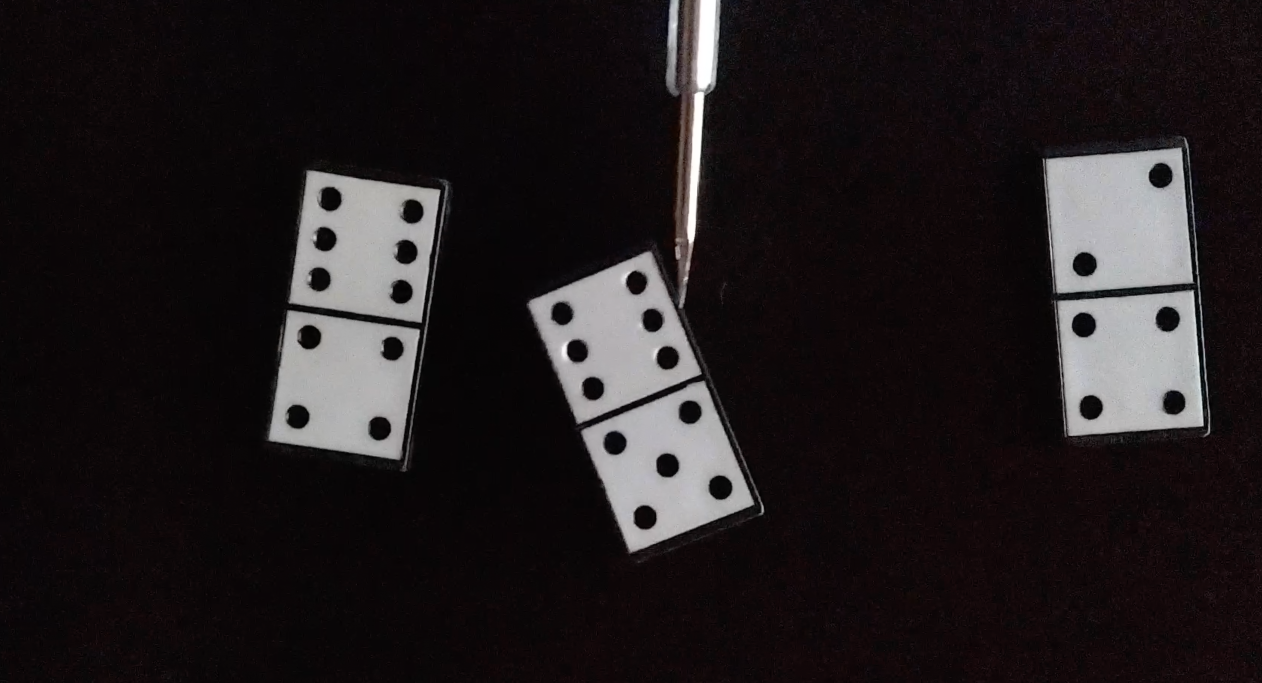

In [ ]:
url = r'https://raw.githubusercontent.com/jaworskimateusz/machine-vision/master/photos/domino2.png'
resp = requests.get(url, stream = True).raw
image = np.asarray(bytearray(resp.read()), dtype = "uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image_=image
print("Вывод первого изображения: ")
dim=(1262,683)
image_ = cv2.resize(image_, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(image_)




Вывод второго изображения: 


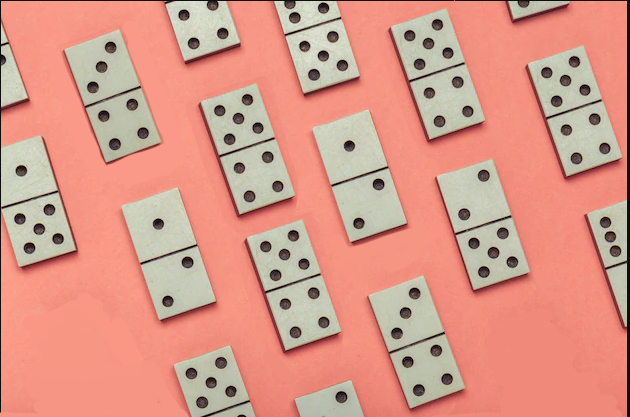

In [ ]:
url = r'https://i.ibb.co/8Xb8RhP/Screenshot-26.jpg'
resp = requests.get(url, stream = True).raw
image2 = np.asarray(bytearray(resp.read()), dtype = "uint8")
image2 = cv2.imdecode(image2, cv2.IMREAD_COLOR)
print("Вывод второго изображения: ")
cv2_imshow(image2)


Вывод второго изображения: 


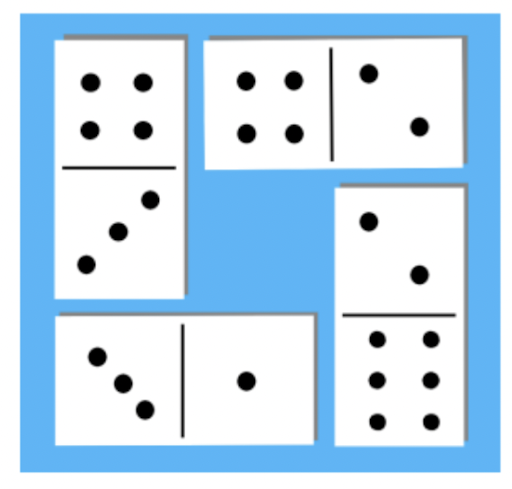

In [ ]:
url = r'https://lh3.googleusercontent.com/-VOyChDxxCTI/YU3FqMyiMSI/AAAAAAAATik/6wEZEUy3kOQMbv_uQBn-K5q8pjzHnZxOgCLcBGAsYHQ/Screen%2BShot%2B2021-09-24%2Bat%2B8.32.55%2BAM.png'
resp = requests.get(url, stream = True).raw
image3 = np.asarray(bytearray(resp.read()), dtype = "uint8")
image3 = cv2.imdecode(image3, cv2.IMREAD_COLOR)
print("Вывод второго изображения: ")

cv2_imshow(image3)


# 1.Используем методы cv2.threshold, cv2.HoughCircles, cv2.findcontour

# 1.1 используем данные методы для первого фото:


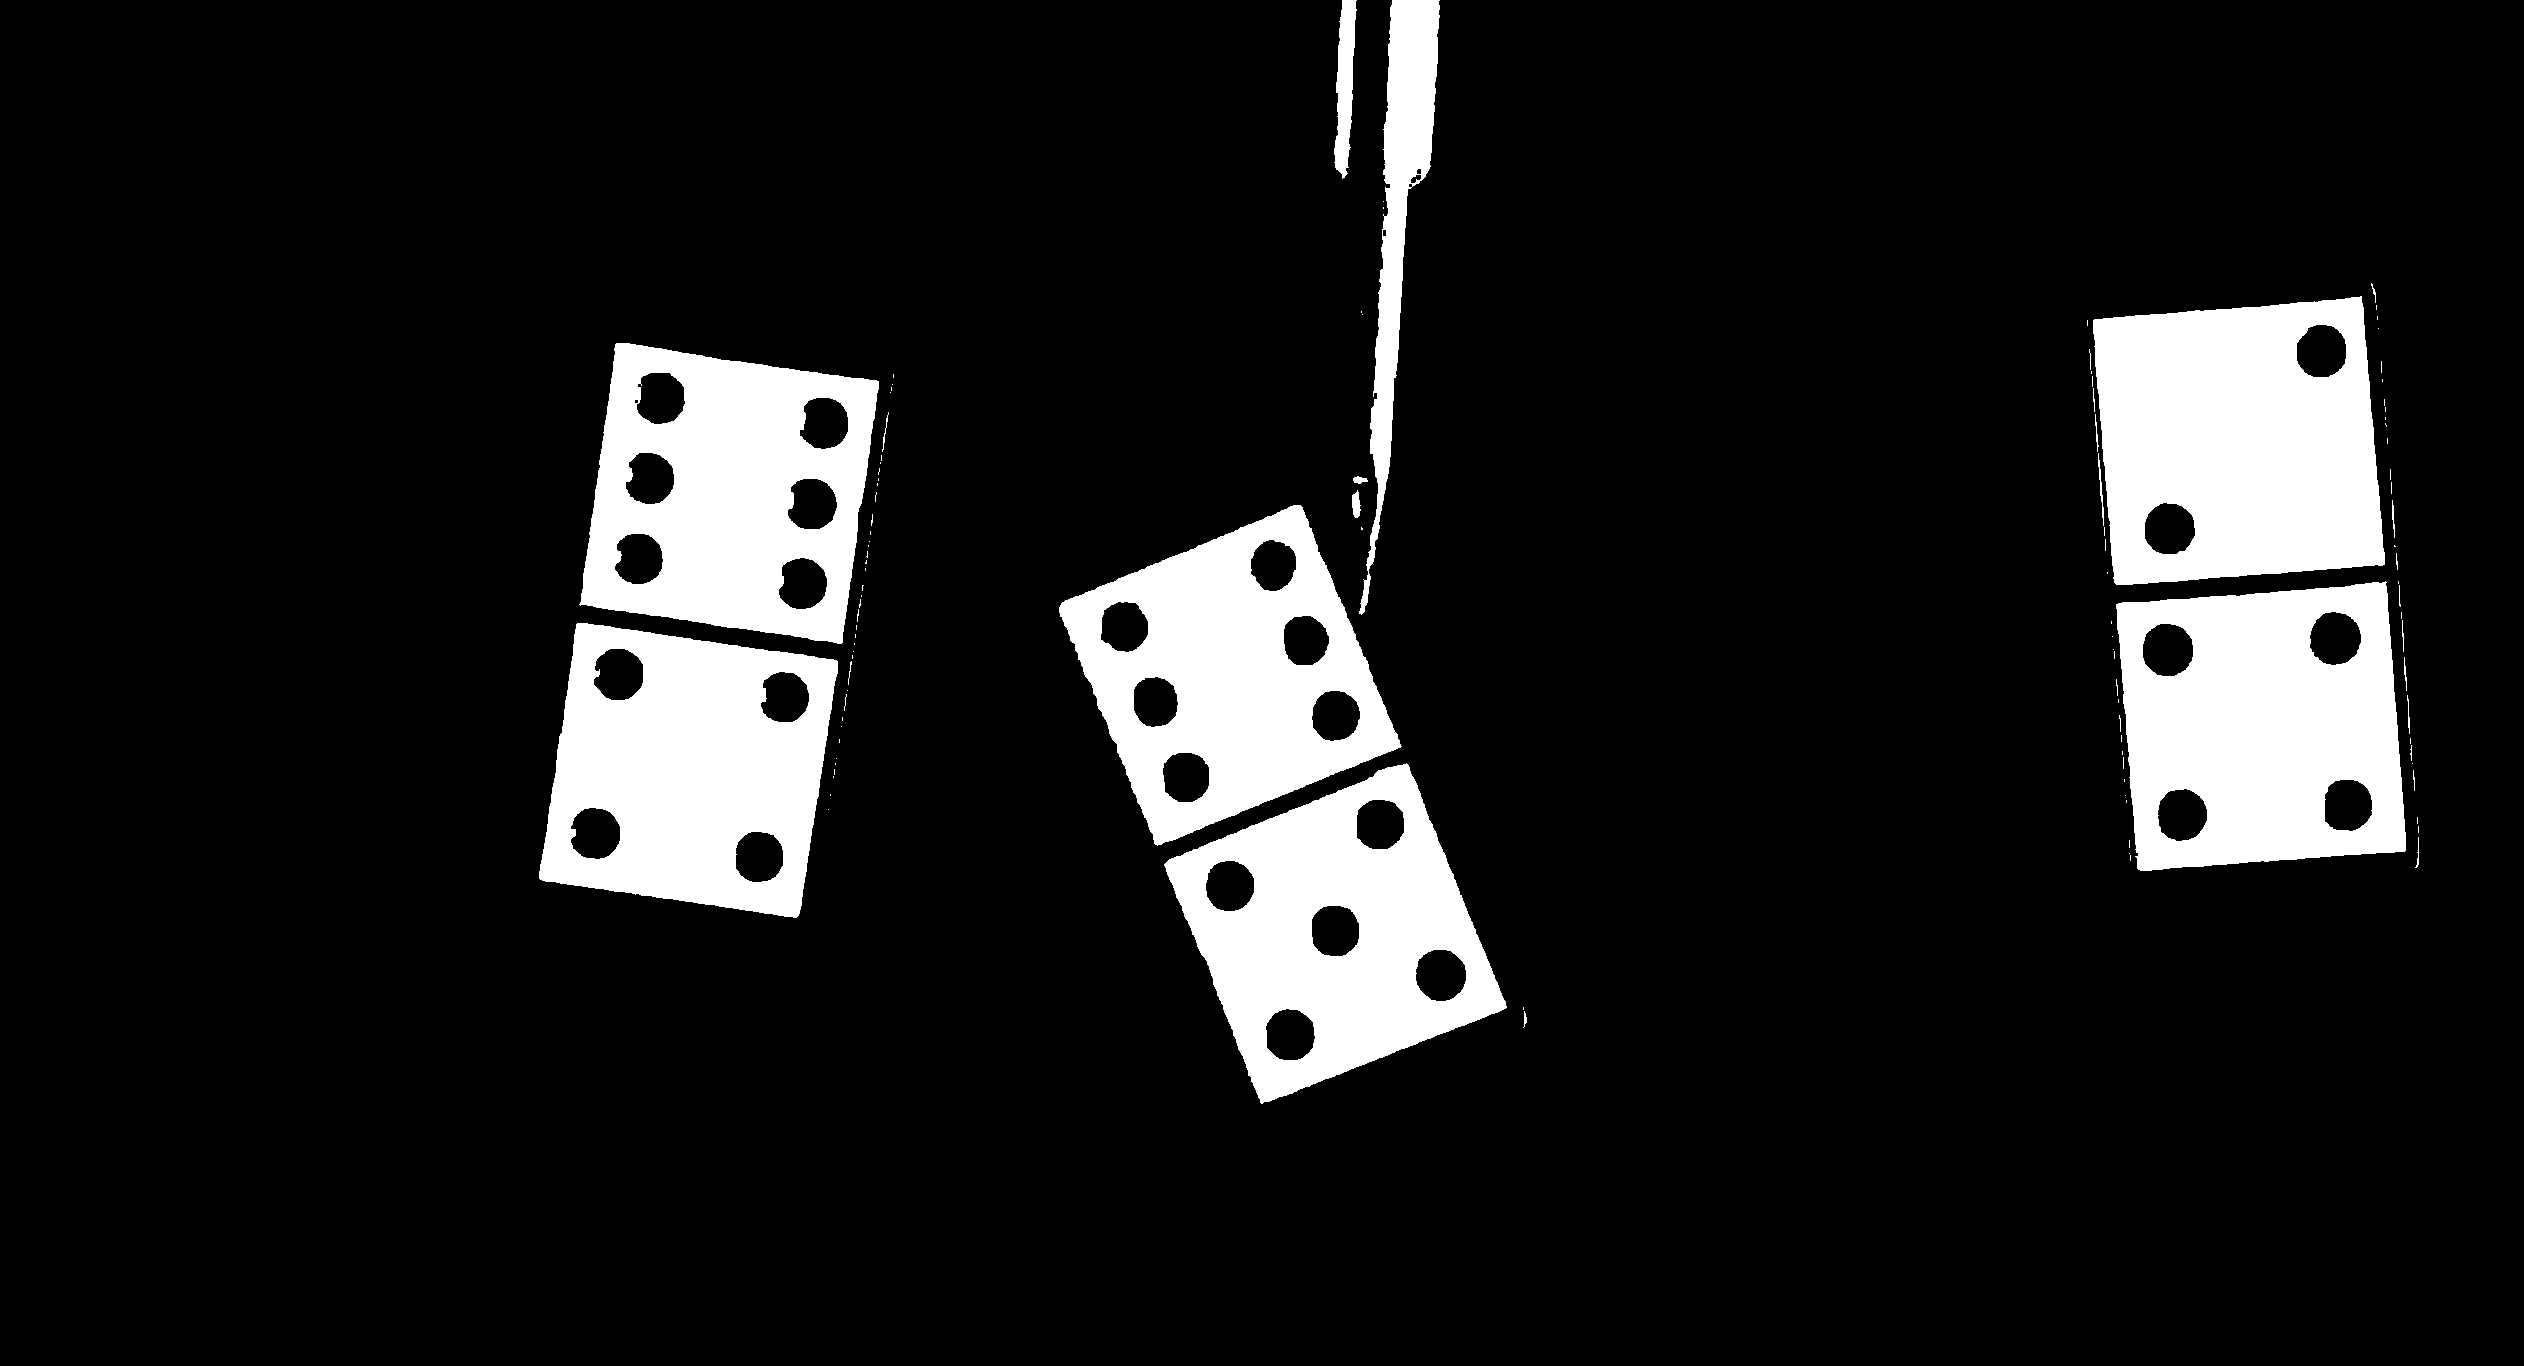

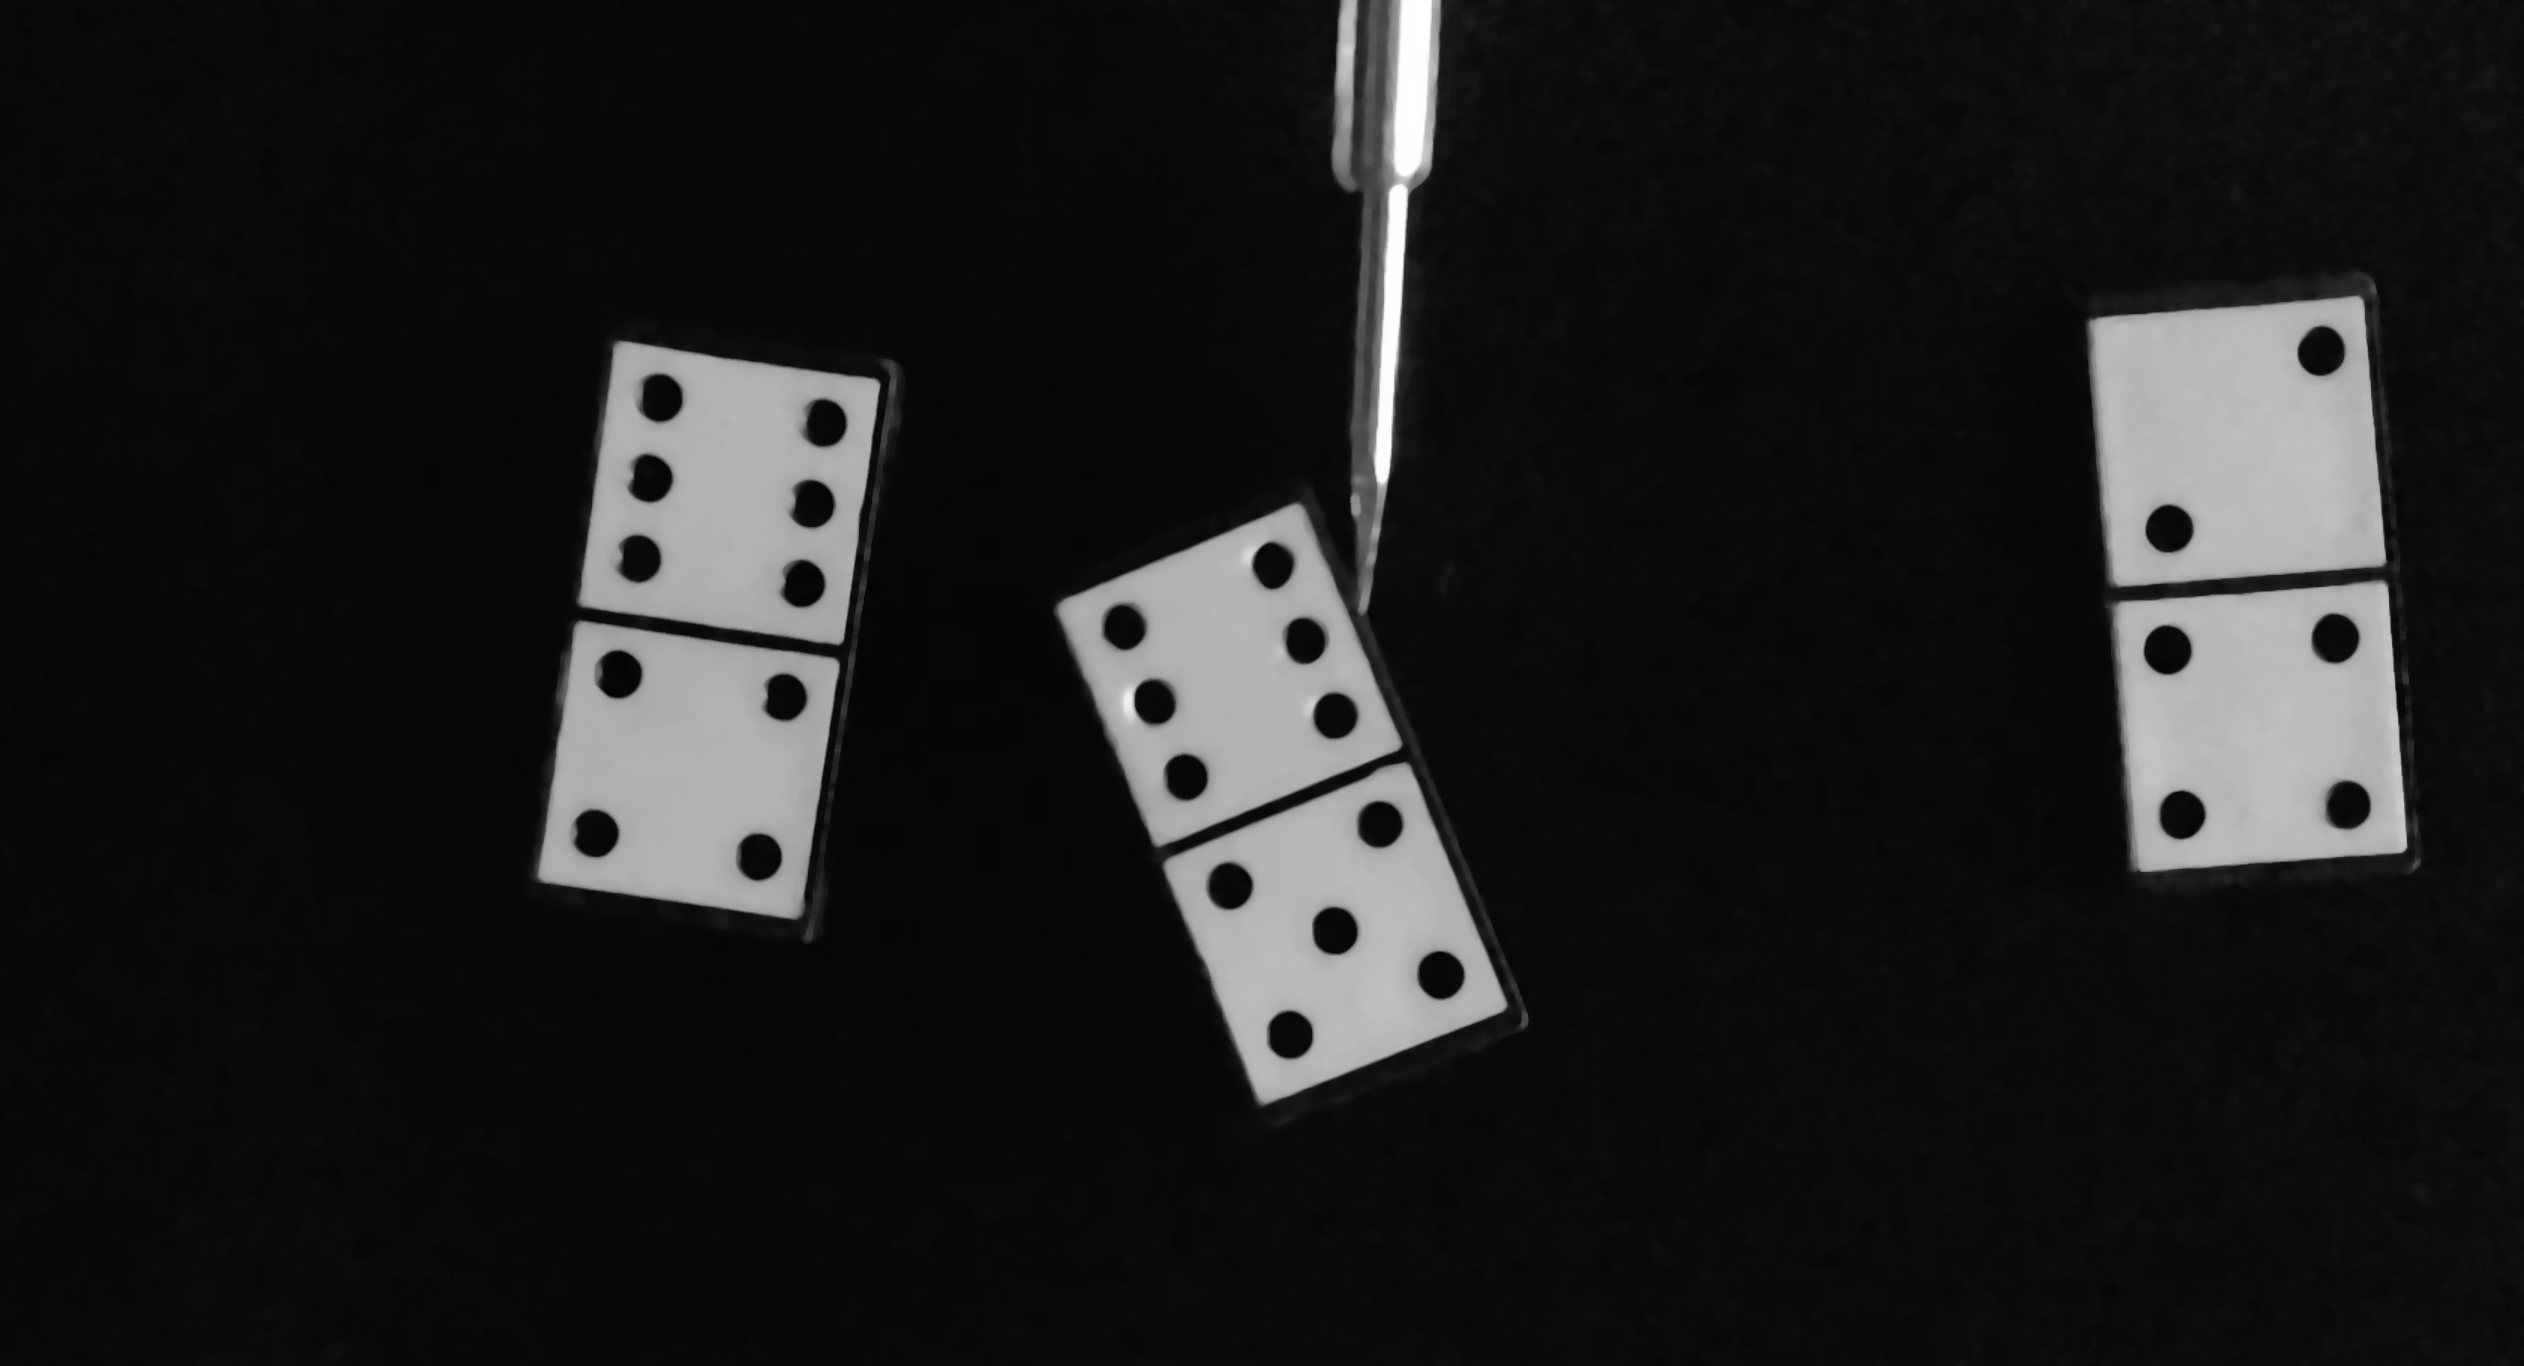

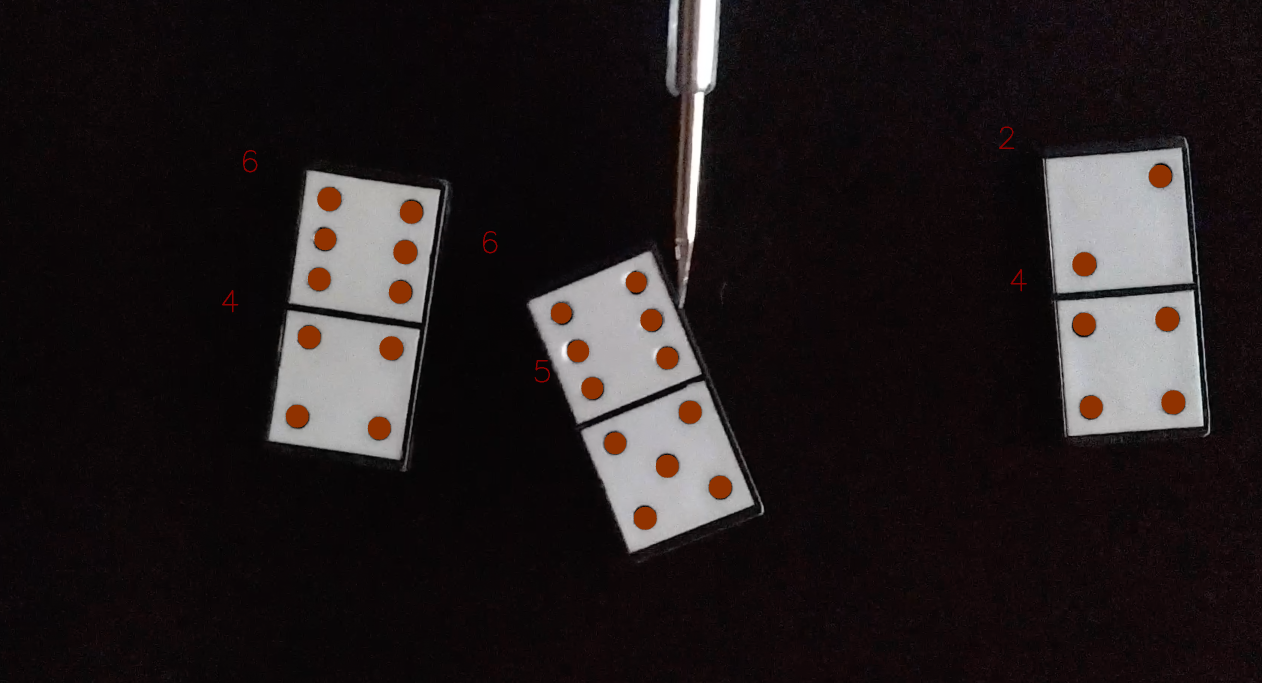

In [ ]:
def draw_dots(square, circles, frame):
    i = 0
    x1 = 0
    y1 = 0
    for square in square:
        for (x, y, r) in circles:
           
            if cv2.pointPolygonTest(square, (x, y), False) == 1:
                (x1, y1, w, h) = cv2.boundingRect(square)
                cv2.circle(frame, (x, y), r, (0, 50, 144), -1)
                i += 1
                               
        cv2.putText(
            frame,
            "{}".format(i),
            (x1 - 100, y1),
            cv2.FONT_HERSHEY_SIMPLEX,
            2,
            (0, 0, 144),
            2,
        )
        
        i = 0
    return frame
import numpy as np
import cv2


# arrays for dots
squares = []
domino_circles = []

frame = image

img_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(img_grey, 100, 255, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
thrash = cv2.erode(thrash, kernel, iterations=1)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2_imshow(thrash)
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 9000:
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        if len(approx) == 4:
            squares.append(contour)
            #cv2.drawContours(frame, [approx], 0, (255, 255, 255), 6)
# finding dots
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 11)
cv2_imshow(gray)
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, 1, 30, param1=60, param2=30, minRadius=0, maxRadius=0
)
detected_circles = np.uint16(np.around(circles))

for (x, y, r) in detected_circles[0, :]:
    if r < 25 and r > 5:
        domino_circles.append((x, y, r))

frame = draw_dots(squares, domino_circles, frame)
squares = []
domino_circles = []
dim=(1262,683)
frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(frame)

# 1.2 используем данные методы для второго фото

Вывод второго изображения: 


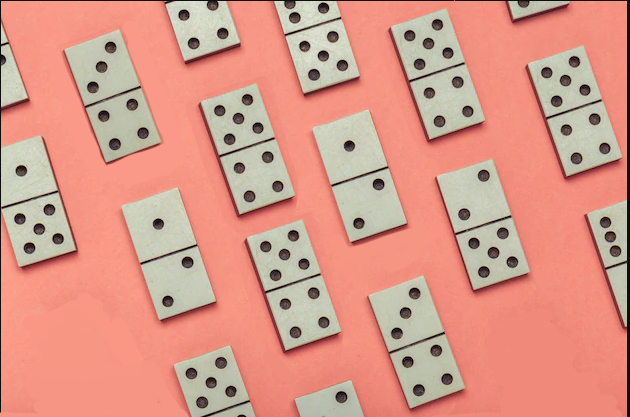

canny


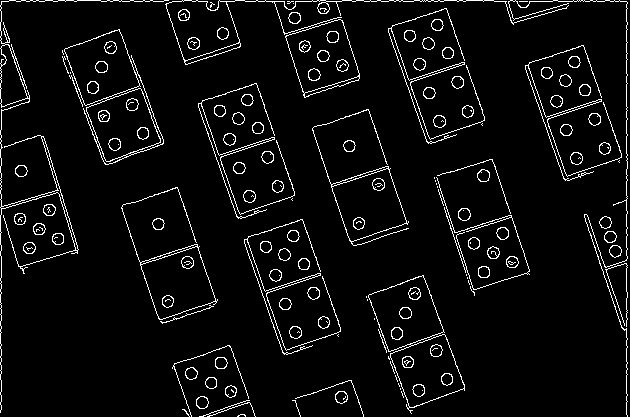

closed


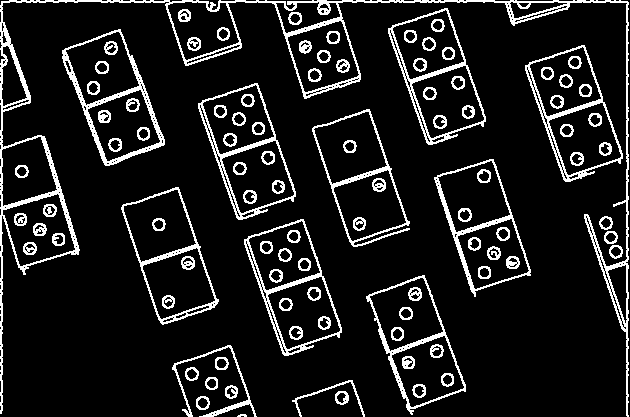

thrash


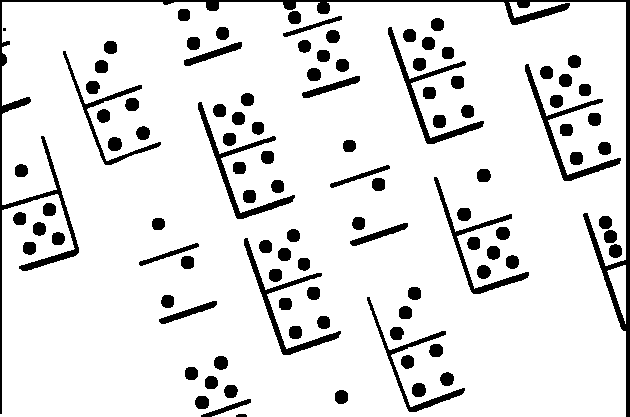

image3


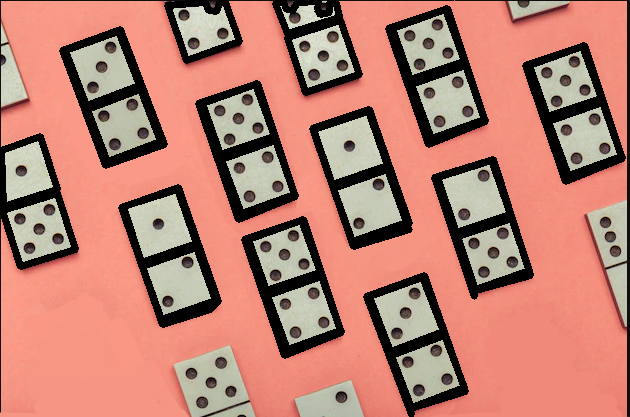

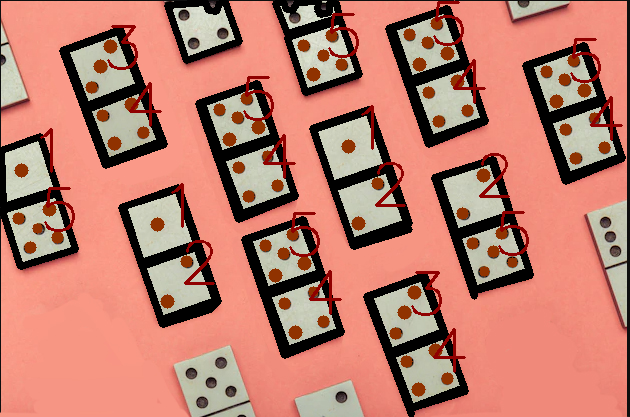

In [ ]:
import numpy as np
import cv2
url = r'https://i.ibb.co/8Xb8RhP/Screenshot-26.jpg'
resp = requests.get(url, stream = True).raw
image3 = np.asarray(bytearray(resp.read()), dtype = "uint8")
image3 = cv2.imdecode(image3, cv2.IMREAD_COLOR)
print("Вывод второго изображения: ")
cv2_imshow(image3)
pryamougs = []
littleprymougs = []
def draw_dots(square, circles, frame):
    i = 0
    c=0
    x1 = 0
    y1 = 0
    for square in square:
      (x1, y1, w, h) = cv2.boundingRect(square)
      for (x, y, r) in circles:
          # cv2.putText(frame,"{} {}".format(w,h),(x, y),cv2.FONT_HERSHEY_SIMPLEX,2,(0, 0, 144),2,)
          if cv2.pointPolygonTest(square, (x, y), False) == 1:
              cv2.circle(frame, (x, y), r, (0, 50, 144), -1)
              i += 1
      if(i<6):
        cv2.putText(
          frame,
          "{}".format(i),
          (x1+int(w/2), y1+int(h/2)),
          cv2.FONT_HERSHEY_SIMPLEX,
          2,
          (0, 0, 144),
          2,
      )
      
      i = 0
    return frame

# arrays for dots
squares = []
domino_circles = []

frame = image3

img_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(img_grey, 100, 255, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
thrash = cv2.erode(thrash, kernel, iterations=1)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)


canny = cv2.Canny(img_grey, 100, 250)
print("canny")
cv2_imshow(canny)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
closed = cv2.dilate(canny, kernel, iterations=1)
print("closed")
cv2_imshow(closed)
contours, _ = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("thrash")
cv2_imshow(thrash)



for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000 and area <20000:
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        cv2.drawContours(image3, [approx], 0, (0, 0, 0), 5)
        if len(approx) == 4:
            squares.append(contour)
            #cv2.drawContours(frame, [approx], 0, (255, 255, 255), 6)
# finding dots

print("image3")
cv2_imshow(image3)
# cv2_imshow(gray)
circles = cv2.HoughCircles(
    thrash, cv2.HOUGH_GRADIENT, 1, 4, param1=18, param2=11, minRadius=3, maxRadius=13
)

detected_circles = np.uint16(np.around(circles))
#print(circles)
for (x, y, r) in circles[0, :]:
    if r < 15 and r > 3:
        domino_circles.append((x, y, r))
# for contour in contours:
#     x,y,w,h = cv2.boundingRect(contour)
#     cv2.putText(frame, str(w), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#     cv2.rectangle(frame, (x, y), (x + w, y + h), (36,255,12), 1)
frame = draw_dots(squares, domino_circles, frame)

squares = []
domino_circles = []

cv2_imshow(frame)

# 1.3 используем данные методы для третьего фото

Вывод второго изображения: 


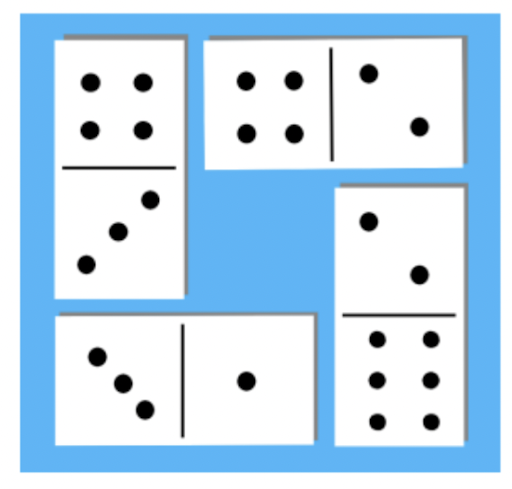

canny


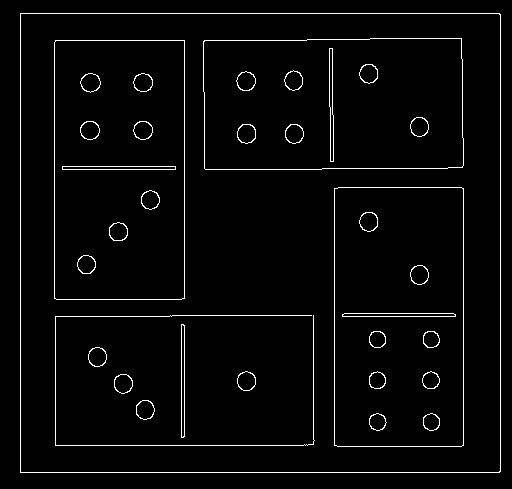

closed


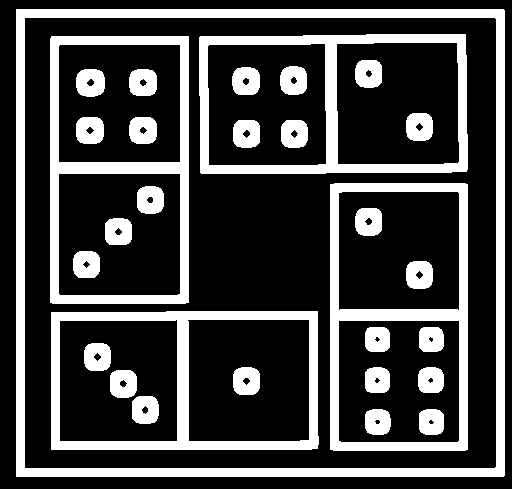

thrash


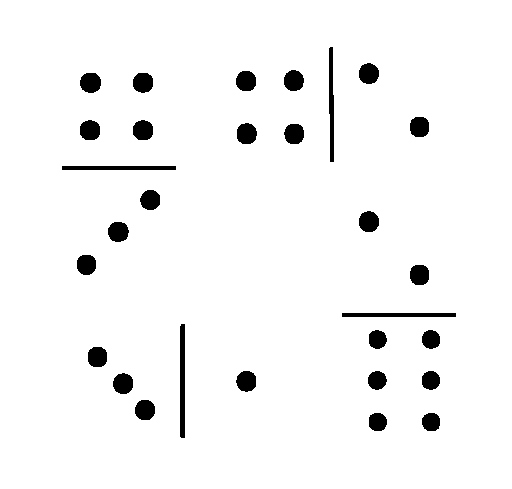

image3


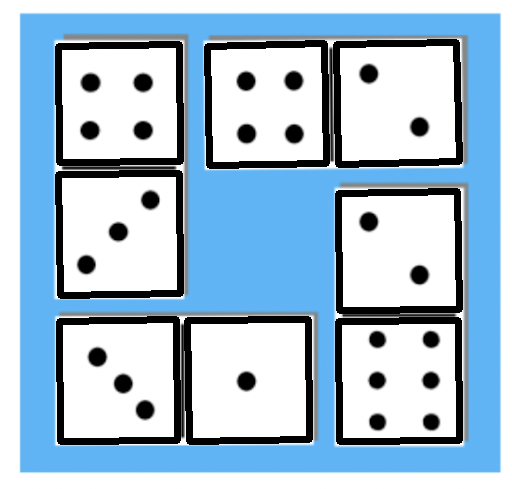

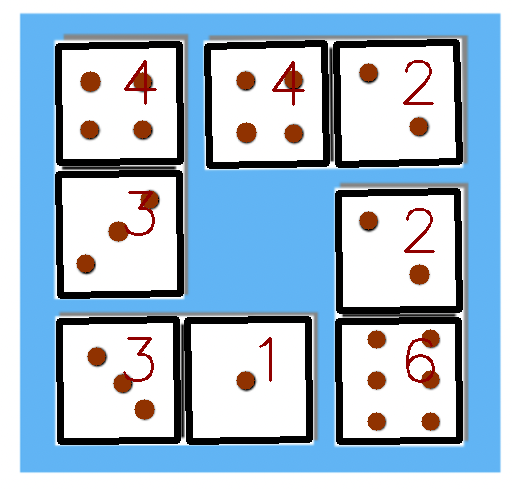

In [ ]:
import numpy as np
import cv2


url = r'https://lh3.googleusercontent.com/-VOyChDxxCTI/YU3FqMyiMSI/AAAAAAAATik/6wEZEUy3kOQMbv_uQBn-K5q8pjzHnZxOgCLcBGAsYHQ/Screen%2BShot%2B2021-09-24%2Bat%2B8.32.55%2BAM.png'
resp = requests.get(url, stream = True).raw
image3 = np.asarray(bytearray(resp.read()), dtype = "uint8")
image3 = cv2.imdecode(image3, cv2.IMREAD_COLOR)
print("Вывод второго изображения: ")
cv2_imshow(image3)
pryamougs = []
littleprymougs = []
def draw_dots(square, circles, frame):
    i = 0
    c=0
    x1 = 0
    y1 = 0
    for square in square:
      (x1, y1, w, h) = cv2.boundingRect(square)
      for (x, y, r) in circles:
          # cv2.putText(frame,"{} {}".format(w,h),(x, y),cv2.FONT_HERSHEY_SIMPLEX,2,(0, 0, 144),2,)
          if cv2.pointPolygonTest(square, (x, y), False) == 1:
              cv2.circle(frame, (x, y), r, (0, 50, 144), -1)
              i += 1
      cv2.putText(
          frame,
          "{}".format(i),
          (x1+int(w/2), y1+int(h/2)),
          cv2.FONT_HERSHEY_SIMPLEX,
          2,
          (0, 0, 144),
          2,
      )
      i = 0
    return frame

# arrays for dots
squares = []
domino_circles = []

frame = image3

img_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(img_grey, 100, 255, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
thrash = cv2.erode(thrash, kernel, iterations=1)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)


canny = cv2.Canny(img_grey, 100, 250)
print("canny")
cv2_imshow(canny)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
closed = cv2.dilate(canny, kernel, iterations=1)
print("closed")
cv2_imshow(closed)
contours, _ = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("thrash")
cv2_imshow(thrash)



for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000 and area <20000:
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        cv2.drawContours(image3, [approx], 0, (0, 0, 0), 5)
        if len(approx) == 4:
            squares.append(contour)
            #cv2.drawContours(frame, [approx], 0, (255, 255, 255), 6)
# finding dots

print("image3")
cv2_imshow(image3)
# cv2_imshow(gray)
circles = cv2.HoughCircles(
    thrash, cv2.HOUGH_GRADIENT, 1, 4, param1=25, param2=13, minRadius=5, maxRadius=13
)

detected_circles = np.uint16(np.around(circles))
#print(circles)
for (x, y, r) in circles[0, :]:
    if r < 15 and r > 6:
        domino_circles.append((x, y, r))
# for contour in contours:
#     x,y,w,h = cv2.boundingRect(contour)
#     cv2.putText(frame, str(w), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#     cv2.rectangle(frame, (x, y), (x + w, y + h), (36,255,12), 1)
frame = draw_dots(squares, domino_circles, frame)

squares = []
domino_circles = []

cv2_imshow(frame)

# **Вывод по проделанной работе**
Используя различные методы для поиска доминошек на фото можно увидеть, что с помощью методов threshold, findContour и houghcircles алгоритм работает верно.

Применяя данные методы, получаются лучшие результаты, что можно увидеть на фото, которые были взяты в качестве примера.